<a href="https://colab.research.google.com/github/MohaYass92/GAN-for-MNIST-Digit-Generation/blob/main/TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📦 Install and import everything
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

# 📥 Load MNIST data
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)

BUFFER_SIZE = 60000
BATCH_SIZE = 256
EPOCHS = 100
noise_dim = 100
seed = tf.random.normal([16, noise_dim])

train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# 🧠 Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid')
    ])
    return model


# 🔍 Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


# 🔧 Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + \
           cross_entropy(tf.zeros_like(fake_output), fake_output)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = build_generator()
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)


# 🎨 Helper to generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(predictions[i,:,:,0], cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.close()

# 🔁 Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

# 🔁 Training loop
for epoch in range(EPOCHS):
    for image_batch in train_dataset:
        train_step(image_batch)

    generate_and_save_images(generator, epoch+1, seed)
    print(f"✅ Epoch {epoch+1} done")

print("🎉 Training complete!")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Epoch 1 done
✅ Epoch 2 done
✅ Epoch 3 done
✅ Epoch 4 done
✅ Epoch 5 done
✅ Epoch 6 done
✅ Epoch 7 done
✅ Epoch 8 done
✅ Epoch 9 done
✅ Epoch 10 done
✅ Epoch 11 done
✅ Epoch 12 done
✅ Epoch 13 done
✅ Epoch 14 done
✅ Epoch 15 done
✅ Epoch 16 done
✅ Epoch 17 done
✅ Epoch 18 done
✅ Epoch 19 done
✅ Epoch 20 done
✅ Epoch 21 done
✅ Epoch 22 done
✅ Epoch 23 done
✅ Epoch 24 done
✅ Epoch 25 done
✅ Epoch 26 done
✅ Epoch 27 done
✅ Epoch 28 done
✅ Epoch 29 done
✅ Epoch 30 done
✅ Epoch 31 done
✅ Epoch 32 done
✅ Epoch 33 done
✅ Epoch 34 done
✅ Epoch 35 done
✅ Epoch 36 done
✅ Epoch 37 done
✅ Epoch 38 done
✅ Epoch 39 done
✅ Epoch 40 done
✅ Epoch 41 done
✅ Epoch 42 done
✅ Epoch 43 done
✅ Epoch 44 done
✅ Epoch 45 done
✅ Epoch 46 done
✅ Epoch 47 done
✅ Epoch 48 done
✅ Epoch 49 done
✅ Epoch 50 done
✅ Epoch 51 done
✅ Epoch 52 done
✅ Epoch 53 done
✅ Epoch 54 done
✅ Epoch 55 done
✅ Epoch 56 done
✅ Epoch 57 done
✅ Epoch 58 done
✅ Epoch 59 done
✅ Epoch 60 done
✅ Epoch 61 done
✅ Epoch 62 done
✅ Epoch 63 done
✅

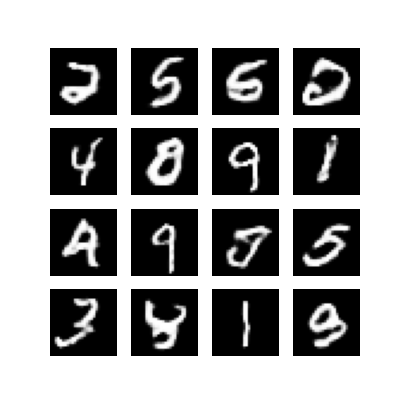

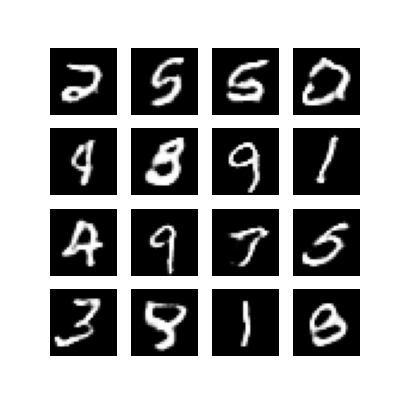

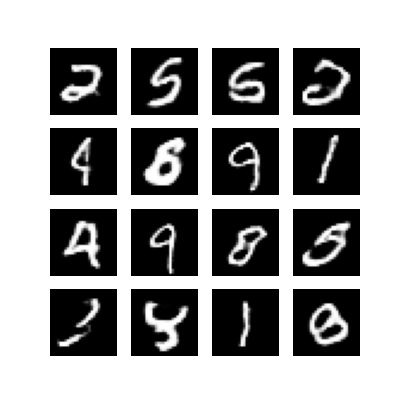

In [3]:
from IPython.display import Image, display
display(Image(filename='image_at_epoch_0080.png'))
display(Image(filename='image_at_epoch_0090.png'))
display(Image(filename='image_at_epoch_0100.png'))

In [4]:
generator.save('mnist_generator.h5')
from google.colab import files
files.download('mnist_generator.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>